<a href="https://colab.research.google.com/github/ddutta111/Financial-Stock-Analysis-of-Top-Investment-Banks/blob/main/Financial_Stock_Analysis_of_Top_Investment_Banks(1st_Jan_2011_1st_Jan_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Financial Stock Data Analysis of Top Investment Banks in the US and Europe

This is an exploratory data analysis of six investment banks' from stock prices from NYSE from period Jan 2011 - Jan 2023 with focus on the covid time-period (2020-2022)

# Importing the Libraries #

We stared to collect the data from yfinance by using yfinance library and other imported other libraries which we will required for the subsequent stock performance analysis visuatization.

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas_datareader.data as web
import yfinance as yf

## **Importing the Dataset**

We download data from Yahoo Finance by using yfinance.The following investment banks' stocks data are collected:

*   J P Morgan & Chase Co
*   Morgan Stanley
*   UBS
*   Barclays Bank Plc
*   Goldman Sach
*   HSBC

**The Stocks data time period is from Jan 1st 2011 - Jan 1st 2023.Setting each bank to a different data frame with the variable name for that bank as its ticker symbol.**













In [ ]:
# Barclays Bank Plc.
BCS = yf.download("BCS", start = "2011-01-01", end = "2023-01-01")
# Goldman Sach
GS = yf.download("GS", start = "2011-01-01", end = "2023-01-01")
# HSBC.
HSBC = yf.download("HSBC", start = "2011-01-01", end = "2023-01-01")
# J P Morgan & Chase Co.
JPM = yf.download("JPM", start = "2011-01-01", end = "2023-01-01")
# Morgan Stanley
MS = yf.download("MS", start = "2011-01-01", end = "2023-01-01")
# UBS Corp.
UBS = yf.download("UBS", start = "2011-01-01", end = "2023-01-01")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Create a list of Bank stock symbols (as strings) in alphabatical order. The list is called: 'tickers'

In [ ]:
tickers = ['BCS', 'GS', 'HSBC', 'JPM', 'MS', 'UBS']

pd.concat function is used to concatenate each bank's data frame together into a single dataframe aclled bank_stocks.

In [ ]:
bank_stocks=pd.concat([JPM, MS, UBS, BCS, GS, HSBC],axis=1,keys=tickers)

Setting the Column name levels

In [ ]:
bank_stocks.columns.names = ["Bank Ticker", "Stock Info"]

Print the head of bank_stocks data frame

In [ ]:
bank_stocks = np.round(bank_stocks, decimals=2)
bank_stocks.head()

Bank Ticker    BCS                                              GS         \
Stock Info    Open   High    Low  Close Adj Close    Volume   Open   High   
Date                                                                        
2011-01-03   43.00  44.04  42.96  43.58     29.95  43278500  27.63  28.57   
2011-01-04   43.78  44.30  43.34  44.16     30.38  40036800  28.46  28.50   
2011-01-05   43.92  44.95  43.90  44.70     30.75  50032500  28.36  28.83   
2011-01-06   44.40  44.80  44.25  44.48     30.60  31606200  28.85  28.98   
2011-01-07   44.54  44.59  42.65  43.64     30.02  69579400  28.84  28.89   

Bank Ticker                ...      MS                               UBS  \
Stock Info     Low  Close  ...     Low   Close Adj Close   Volume   Open   
Date                       ...                                             
2011-01-03   27.48  28.23  ...  169.85  173.05    136.02  5717100  51.32   
2011-01-04   28.00  28.47  ...  172.00  173.08    136.04  3335500  52.25   
2011-01-05   28.30  28.83  ...  172.00  174.00    136.76  4140600  52.70   
2011-01-06   28.58  28.80  ...  171.98  172.21    135.36  5375200  53.85   
2011-01-07   28.00  28.20  ...  169.36  170.69    134.16  4916100  53.29   

Bank Ticker                                          
Stock Info    High    Low  Close Adj Close   Volume  
Date                                                 
2011-01-03   51.80  51.28  51.64     24.67  1299900  
2011-01-04   52.27  51.88  52.07     24.88  2377200  
2011-01-05   53.39  52.70  53.38     25.51  3766800  
2011-01-06   53.88  52.95  53.27     25.45  1733000  
2011-01-07   53.39  52.67  52.90     25.28  1897000  

[5 rows x 36 columns]

# **Explorative Data Analysis**

Here, we will look for answers for some important questions in order to understand the performnace of banks' stocks during the given time period in the datase!

# Finding the maximum closing price for each bank's stock throughout the time time period Jan 1st 2011 to Jan 1st 2023

In [ ]:
bank_stocks.xs('Close', axis=1, level='Stock Info')

Bank Ticker,BCS,GS,HSBC,JPM,MS,UBS
Date,,,,,,
2011-01-03,43.58,28.23,16.71,15.46,173.05,51.64
2011-01-04,44.16,28.47,16.62,15.76,173.08,52.07
2011-01-05,44.70,28.83,16.65,16.08,174.00,53.38
2011-01-06,44.48,28.80,16.78,15.91,172.21,53.27
2011-01-07,43.64,28.20,16.43,15.91,170.69,52.90
...,...,...,...,...,...,...
2022-12-23,131.28,86.11,18.62,7.79,345.51,30.94
2022-12-27,131.74,85.06,18.64,7.81,341.97,31.07
2022-12-28,132.46,84.46,18.54,7.74,340.87,31.03


In [ ]:
bank_stocks.xs('Close', axis=1, level='Stock Info').max()

Bank Ticker
BCS     171.78
GS      108.73
HSBC     23.20
JPM      19.94
MS      423.85
UBS      58.99
dtype: float64

Finding the returns for each bank stocks in a single data frame.

The returns are calculated as follows:

Rt = Pt − (Pt−1)/ (Pt−1) = Pt / (Pt−1) -1

where, Rt = Return on a stock at time period t
       Pt = Price of the stock at time period t
     Pt−1 = Price of the stock at time period (t-1)

In [ ]:
# Creating an empty data frame
returns=pd.DataFrame()

In [ ]:
tickers

['BCS', 'GS', 'HSBC', 'JPM', 'MS', 'UBS']

In [ ]:
# Calculating the return for each stock based on percentage change
for tick in tickers:
    returns[tick + ' Return']=bank_stocks[tick]['Close'].pct_change()
returns.head()

,BCS Return,GS Return,HSBC Return,JPM Return,MS Return,UBS Return
Date,,,,,,
2011-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04,0.013309,0.008502,-0.005386,0.019405,0.000173,0.008327
2011-01-05,0.012228,0.012645,0.001805,0.020305,0.005315,0.025158
2011-01-06,-0.004922,-0.001041,0.007808,-0.010572,-0.010287,-0.002061
2011-01-07,-0.018885,-0.020833,-0.020858,0.000000,-0.008826,-0.006946


# What stocks standing out mostly?

#Creating a pairplot in order to figure out and compare the stocks positions throughout the whole time period by using seaborn as the return dataframe.

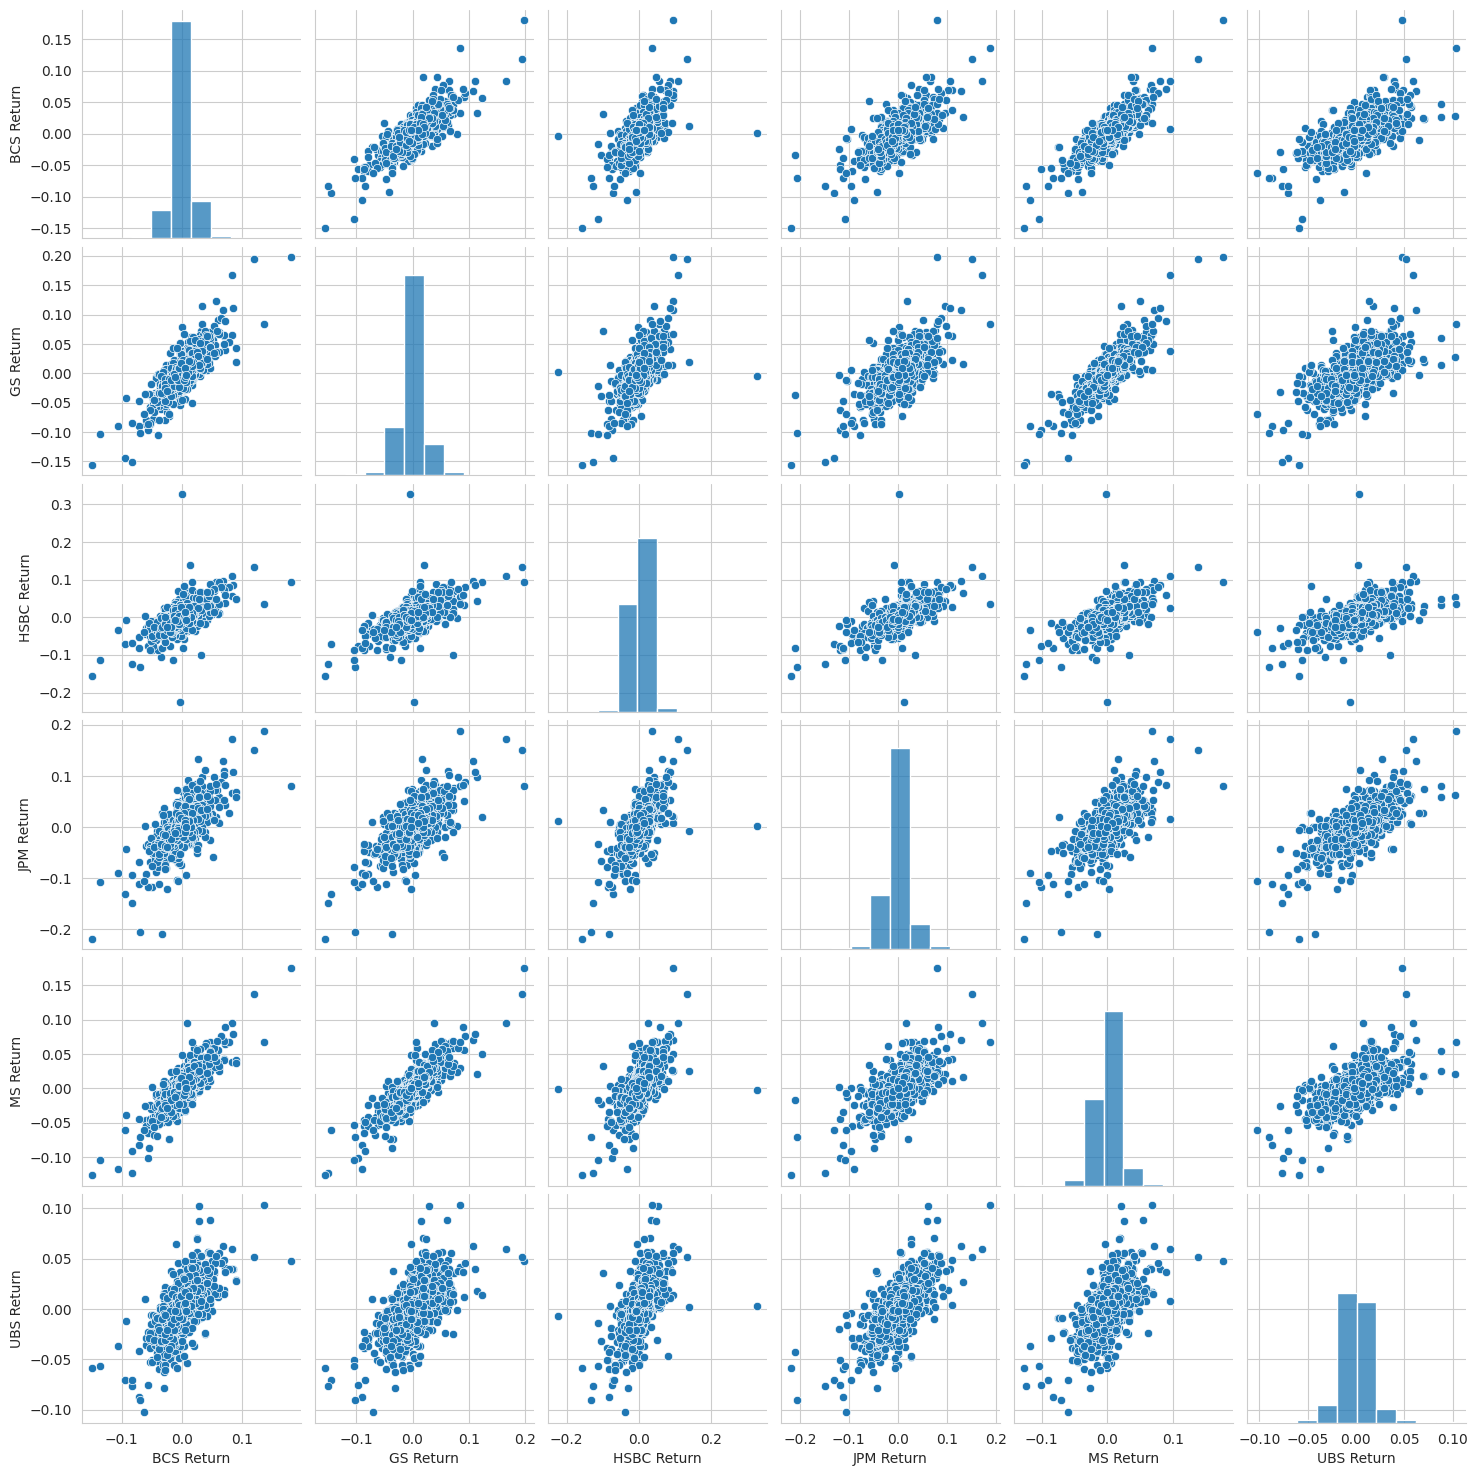

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(returns[1:],diag_kind='hist',diag_kws={'bins': 10})

#Using the dataframes, figure out on what date each banks stocks have the best and worst single day returns

In [ ]:
# Best date of return for each sngle stock over the time period 2011-2022
returns.idxmax()

BCS Return    2020-03-13
GS Return     2020-03-13
HSBC Return   2014-11-26
JPM Return    2020-11-09
MS Return     2020-03-13
UBS Return    2020-11-09
dtype: datetime64[ns]

In [ ]:
# Worst Date of return for each single stock from 2011-2022
returns.idxmin()

BCS Return    2020-03-16
GS Return     2020-03-16
HSBC Return   2014-11-28
JPM Return    2020-03-16
MS Return     2020-03-16
UBS Return    2020-04-01
dtype: datetime64[ns]

#Riskiest stock over the entire time period 2011 - 2023

In [ ]:
# JPM is the riskiest stock over the time period with 0.03 std of returns
np.std(returns)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning:

The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



BCS Return     0.017862
GS Return      0.022097
HSBC Return    0.021497
JPM Return     0.025410
MS Return      0.018270
UBS Return     0.015689
dtype: float64

#Riskiest stock during the crucial covid period 2020-2021

In [ ]:
# During crucial covid time period Mar 2020 to Dec 2021 JPM was the riskiest stock with 0.345 std and others were more or less almost similar
returns.loc['2020-03-01':'2021-12-31'].std()

BCS Return     0.026678
GS Return      0.028541
HSBC Return    0.024191
JPM Return     0.033499
MS Return      0.026498
UBS Return     0.022121
dtype: float64

#Displot of JMP investment Bank's stock return

Creating Displot by using seaborn of the riskiest stock J P Morgan invetsmnet banks's return and comapartively the least riskiest stock UBS's from 1st Jan 2020 to 31st Dec 2021

<Figure size 1000x800 with 0 Axes>

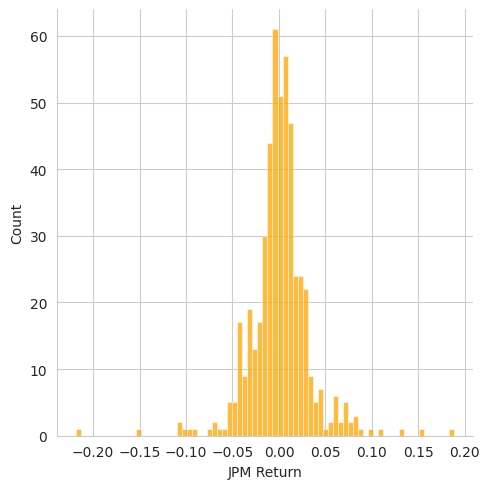

In [ ]:
plt.figure(figsize=(10,8))
sns.displot(returns.loc['2020-01-01':'2021-12-31']['JPM Return'], bins=75,color='orange')

<Figure size 1000x800 with 0 Axes>

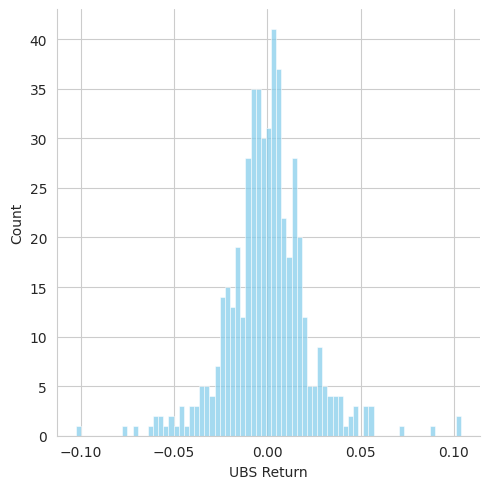

In [ ]:
plt.figure(figsize=(10,8))
sns.displot(returns.loc['2020-01-01':'2021-12-31']['UBS Return'], bins=75,color='skyblue')

#**More Visualizations of data: Line plot, Cluster Map and ilpot**

# Importing plotty and cufflinks libraries

In [ ]:
!pip install plotly

In [ ]:
!pip install cufflinks

In [ ]:
import plotly
import cufflinks as cf
cf.go_offline()
import plotly.subplots as sp
import plotly.graph_objects as go
import matplotlib.dates as mdates

In [ ]:
bank_stocks.head()

Bank Ticker    BCS                                              GS         \
Stock Info    Open   High    Low  Close Adj Close    Volume   Open   High   
Date                                                                        
2011-01-03   43.00  44.04  42.96  43.58     29.95  43278500  27.63  28.57   
2011-01-04   43.78  44.30  43.34  44.16     30.38  40036800  28.46  28.50   
2011-01-05   43.92  44.95  43.90  44.70     30.75  50032500  28.36  28.83   
2011-01-06   44.40  44.80  44.25  44.48     30.60  31606200  28.85  28.98   
2011-01-07   44.54  44.59  42.65  43.64     30.02  69579400  28.84  28.89   

Bank Ticker                ...      MS                               UBS  \
Stock Info     Low  Close  ...     Low   Close Adj Close   Volume   Open   
Date                       ...                                             
2011-01-03   27.48  28.23  ...  169.85  173.05    136.02  5717100  51.32   
2011-01-04   28.00  28.47  ...  172.00  173.08    136.04  3335500  52.25   
2011-01-05   28.30  28.83  ...  172.00  174.00    136.76  4140600  52.70   
2011-01-06   28.58  28.80  ...  171.98  172.21    135.36  5375200  53.85   
2011-01-07   28.00  28.20  ...  169.36  170.69    134.16  4916100  53.29   

Bank Ticker                                          
Stock Info    High    Low  Close Adj Close   Volume  
Date                                                 
2011-01-03   51.80  51.28  51.64     24.67  1299900  
2011-01-04   52.27  51.88  52.07     24.88  2377200  
2011-01-05   53.39  52.70  53.38     25.51  3766800  
2011-01-06   53.88  52.95  53.27     25.45  1733000  
2011-01-07   53.39  52.67  52.90     25.28  1897000  

[5 rows x 36 columns]

# Line Plot showing closing price each bank for entire index of time

<Axes: xlabel='Date'>

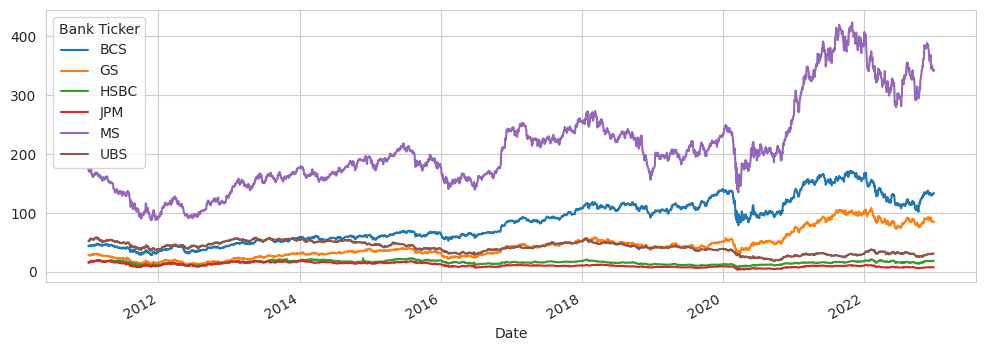

In [ ]:
bank_stocks.xs('Close', axis = 1, level = 'Stock Info').plot(figsize=(12,4))

# **Moving Averages**

# Plotting the 30-day rolling moving average for JPM during peak Covid period (2020-2021)

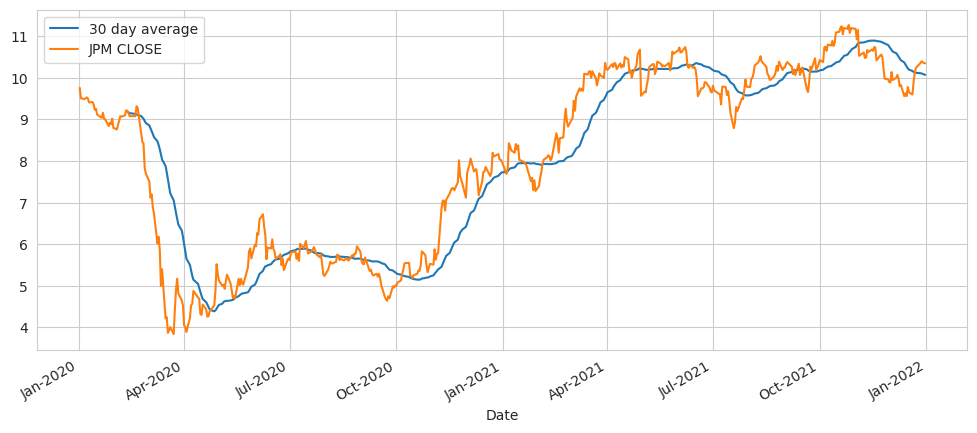

In [ ]:
fig=plt.figure(figsize=(12,5))
s = fig.add_subplot(111)
s.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
bank_stocks['JPM']['Close'].loc['2020-01-01':'2021-12-31'].rolling(window=30).mean().plot(label='30 day average')
bank_stocks['JPM']['Close'].loc['2020-01-01':'2021-12-31'].plot(label='JPM CLOSE')
plt.legend()

#Heatmap: To find the correlation between the stocks' closing prices

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

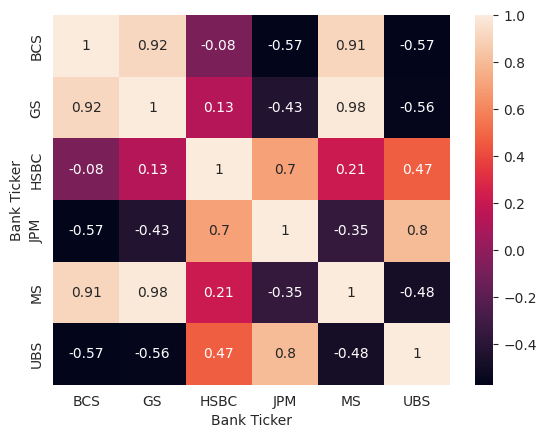

In [ ]:
sns.heatmap(bank_stocks.xs('Close',axis=1,level='Stock Info').corr(),annot=True)
# Barclays, Goldman Sach and Morgan Stanley are strongly corelated to each other whereas UBS, HSBC and JP
# Morgan stock returns are corelated to one another during Covid period

# Seaborn's cluster map to cluster the correlations together

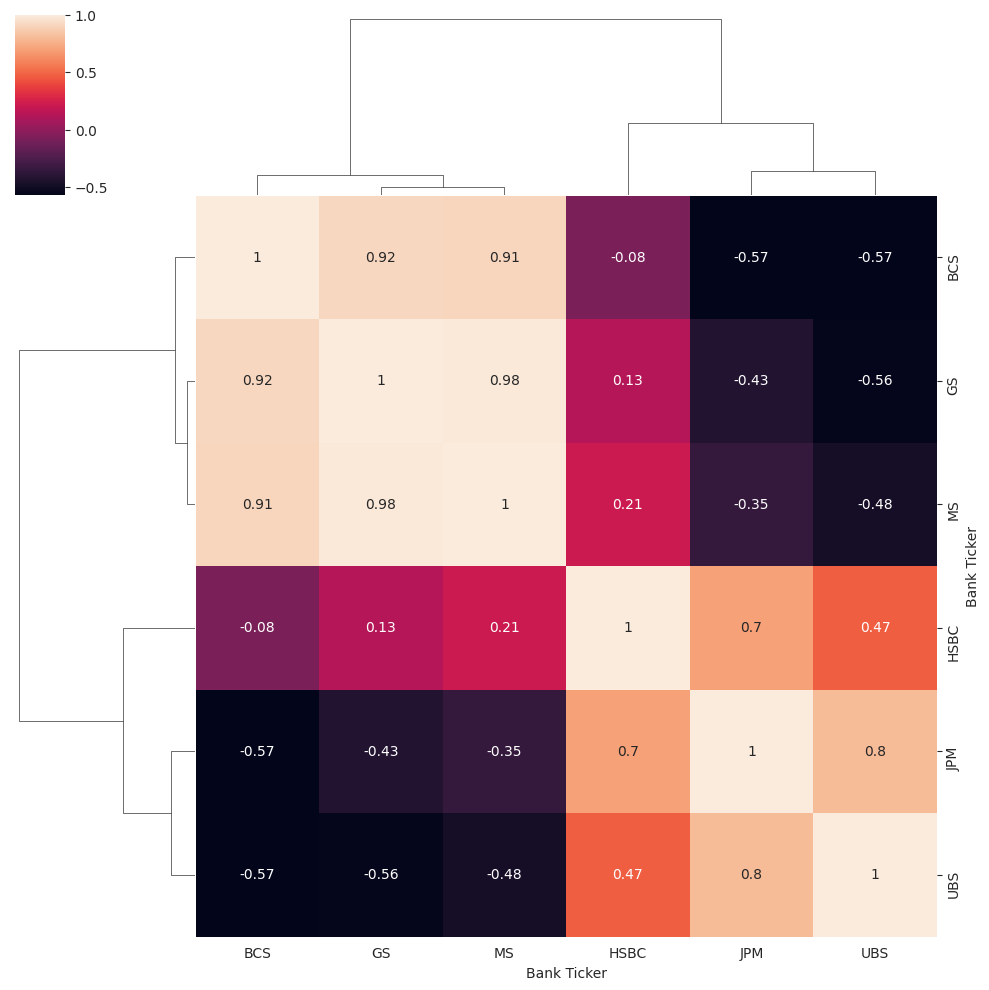

In [ ]:
sns.clustermap(bank_stocks.xs('Close',axis=1,level='Stock Info').corr(),annot=True)

# Conclusion

This Project is an exploratitory financial data analysis. As a result, we see that during covid period as well as throughout 2011 - 2023, JPM is the riskiest stock and UBS is the least risky one.
However, overall there is not much significant difference among their risk level as we go through their std and position of each stock shown by the scatter pair-plots.
Also, the Seaborn Cluster map shows that BCS, JS and MS are highly positively corelated to each other and UBS, JPM and HSBC are corelated to one another.